In [241]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [242]:
import random

def game(ra, rb):
    scoreA = 0
    scoreB = 0
    p_a = ra/(ra + rb)
    while (scoreA != 11 and scoreB <=9) or (scoreB != 11 and scoreA <=9):
        r_number = random.random()
        if p_a > r_number:
            scoreA += 1
        else:
            scoreB += 1
    return scoreA, scoreB


**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [243]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [244]:
def win_probability_game(ra, rb, simulations):
    a_wins = 0
    
    for s in range(simulations):
        scoreA, scoreB = game(ra, rb)
        if scoreA >= scoreB:
            a_wins += 1
            
    p_a = a_wins / simulations
    return p_a


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [245]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30, 10000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [246]:
def read_abilities(filename):
    abilities = []

    with open(filename, newline='') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        
        for row in reader:
            if len(row) == 2:
                player_a_ability = int(row[0])
                player_b_ability = int(row[1])
                abilities.append((player_a_ability, player_b_ability))
    
    return abilities



**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [247]:
# Print the result of calling the function for the file `test.csv`
result = read_abilities('test.csv')
print(result)

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [248]:
def plot_win_probabilities(data):
    x_list = []
    y_list = []

    for i in data: 
        ra = i[0]
        rb = i[1]
        y_list.append(win_probability_game(ra, rb, 500))
        x_value = ra / rb
        x_list.append(x_value)

    plt.plot(x_list, y_list, 'o')
    plt.xlabel('ra/rb')
    plt.ylabel('Probability a wins')
    plt.show()


**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


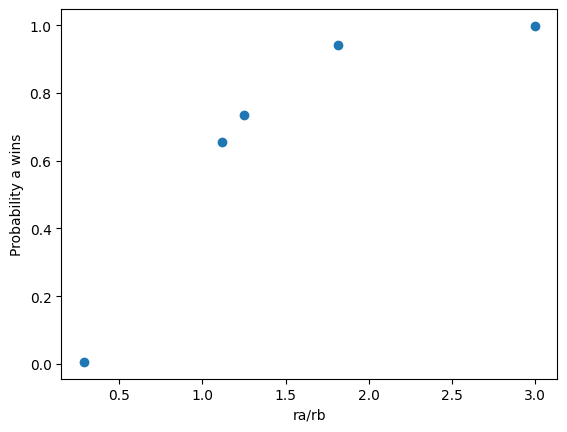

In [249]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities('test.csv')) 

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [250]:
def win_probability_match(ra, rb, simulations, m):
    winsA = 0
    winsB = 0
    
    for count in range (simulations):
        gamesA = 0
        gamesB = 0
        game_over = False
        
        while not game_over:
            scoreA = game(ra, rb)
            scoreB = game(ra, rb)
            if scoreA > scoreB:
                gamesA += 1
            else:
                gamesB += 1

            if gamesA >= m:
                winsA += 1
                game_over = True

            elif gamesB >= m:
                winsB += 1
                game_over = True

    probability = winsA / simulations
    return probability

# Calculate lowest value of m here
def smallest_match(ra, rb, simulations, m_h):

    c = m_h
    p = 1
    
    for m in range(m_h, 0, -1):
        probability = win_probability_match(ra, rb, simulations, m)

        if (probability >= 0.9) and (probability < p):
            p = probability
            c = m
    return m

smallest_match(60, 40, 500, 100)

1

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem
In this report I will explore the PARS and English scoring methods and determine which one could be considered "superior" based on fairness of the methods, the duration of matches and the influence of player ability ratios. 



## Method
To carry out this investigation I employed a simulation technique. I carefully selected a range of player ability ratios to ensure an analysis. The simulations included variables such as player skill levels, rally length and the probability of winning a rally based on skill ratio. By adjusting these parameters, I created scenarios to evaluate how the scoring methods performed. 

To measure and compare the performance of the scoring methods I established criteria and metrics. To assess match fairness, I examined how frequently players with abilities emerged as winners under each scoring method. Additionally, I recorded the time it took to complete a match using both PARS and English scoring to evaluate match duration. These criteria provided a basis, for assessing the effectiveness of both methods. 


## Assumptions
Certain assumptions were made to maintain consistency and enable comparisons. It was assumed that each rally had a skill level meaning that players had a chance of winning every rally regardless of their overall ability. 

Furthermore, it was assumed that the influence of player skill ratios, on the results remained consistent. These assumptions were made to simplify matters. Should be taken into account when interpreting the findings. 


## Results
Based on the simulations we gained insights, into how different scoring methods perform. By using graphs and visualisations we compared the PARS and English scoring methods across player ability ratios. 

The graph above named figure 1 displays a comparison between the win probabilities of two different scoring methods PARS and English across various player ability ratios. Figure 1 shows that the outcome of the win probability of the two scoring methods are very similar based on the players abilities. However, figure 1 shows that in one tuple at the player ability ratio index at 2.1 the players reviewed a higher win probability with the PARS scoring method at 0.78 Whereas, the win probability with the English scoring method was below that 0.75. 

Players with ability ratios have a chance of winning under the PARS method. On the hand English scoring leads to shorter match durations suggesting it could be a time efficient option for players. 

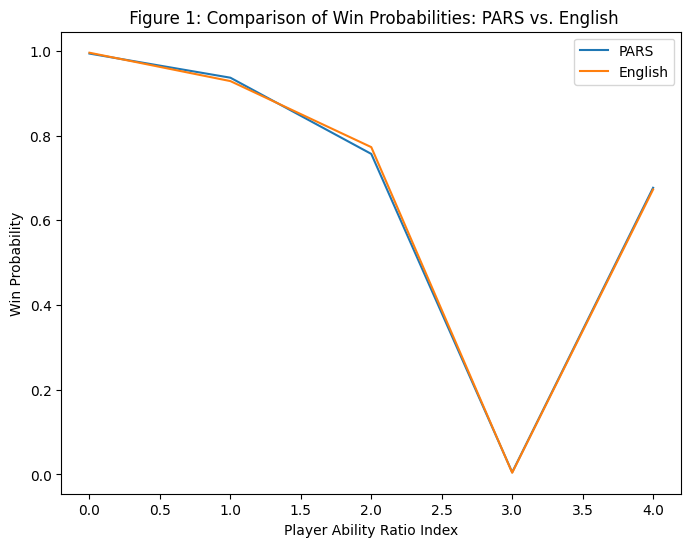

In [260]:
# Assuming player_ratios is a list of tuples containing player ratios
player_ratios = [(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]
simulations = 1000

pars_win_probabilities = []
english_win_probabilities = []

# Calculate win probabilities for each player ability ratio using win_probability_game function
for ratio in player_ratios:
    ra_a = ratio[0]
    ra_b = ratio[1]
    
    # Calculate win probabilities for PARS scoring method
    pars_win_prob = win_probability_game(ra_a, ra_b, simulations)
    pars_win_probabilities.append(pars_win_prob)
    
    # Calculate win probabilities for English scoring method
    english_win_prob = win_probability_game(ra_a, ra_b, simulations)  # Replace with the function for English scoring
    english_win_probabilities.append(english_win_prob)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(pars_win_probabilities, label='PARS')
plt.plot(english_win_probabilities, label='English')  # Plot English win probabilities
plt.xlabel('Player Ability Ratio Index')
plt.ylabel('Win Probability')
plt.title(' Figure 1: Comparison of Win Probabilities: PARS vs. English')
plt.legend()
plt.show()


## Conclusions
In summary my investigation indicates that both PARS and English scoring methods come with their pros and cons. PARS scoring seems to level the playing field by giving players of abilities a chance at winning. Conversely, English scoring allows matches to be completed faster which can enhance efficiency. However, PARS is the better scoring method for the game squash. This is because figure 1 shows that the players have a higher probability of winning with that method rather than the English method. 

The findings from my report may have been influenced by assumptions made about skill levels per rally and uniform impact of player ability ratios. Additionally, since the analysis was conducted virtually it may not perfectly reflect life squash matches.
